**In this dataset we will find who will return a loan.(Predict Loan will be returned by customer or not.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv("./loan prediction/loan.csv")

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data['ApplicantIncome'].isna().any()

False

In [6]:
loan_data['CoapplicantIncome'].isna().any()

False

In [7]:
loan_data['LoanAmount'].isna().any()

True

In [8]:
loan_data['Loan_Amount_Term'].isna().any()

True

In [9]:
loan_data['Credit_History'].isna().any()

True

In [10]:
loan_data['Married'].isna().any()

True

In [11]:
loan_data['Self_Employed'].isna().any()

True

In [12]:
loan_data['Self_Employed'].count()

582

In [13]:
loan_data['Married'].count()

611

In [14]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
loan_data['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [16]:
loan_data['Property_Area'].head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [17]:
loan_data['Loan_Amount_Term'].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [18]:
loan_data['Credit_History'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64

In [19]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

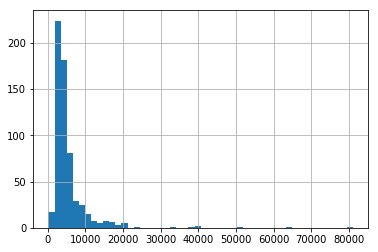

In [22]:
loan_data['ApplicantIncome'].hist(bins=50)

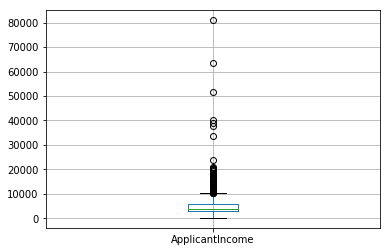

In [23]:
loan_data.boxplot(column = 'ApplicantIncome')

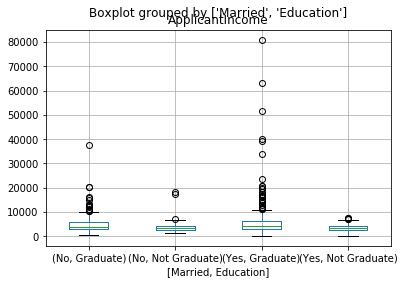

In [24]:
loan_data.boxplot(column ='ApplicantIncome', by=['Married','Education'])

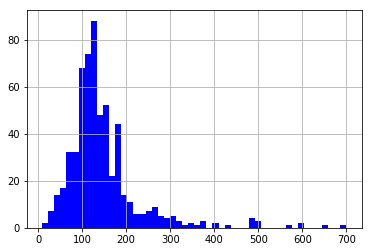

In [25]:
loan_data['LoanAmount'].hist(bins=50, color='Blue')

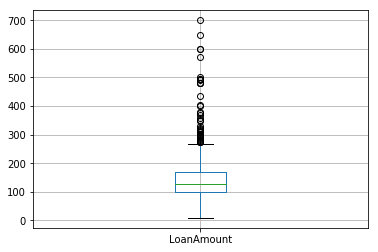

In [26]:
loan_data.boxplot('LoanAmount')

In [27]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
temp1 = loan_data['Credit_History'].value_counts(ascending=True)

In [29]:
temp2 = loan_data.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [30]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [31]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


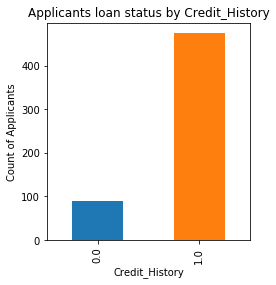

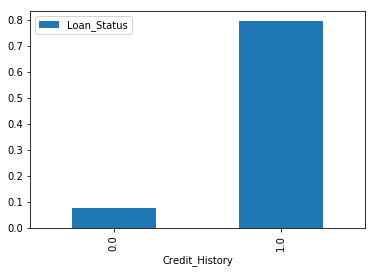

In [33]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants loan status by Credit_History")
temp1.plot(kind='bar')
temp2.plot(kind='bar')

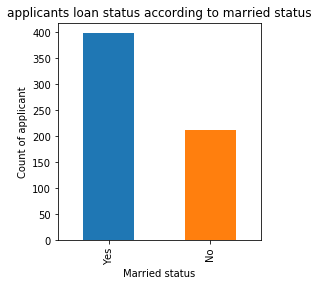

In [34]:
fig1 = plt.figure(figsize=(8,4))
ax2 = fig1.add_subplot(121)
ax2.set_xlabel("Married status")
ax2.set_ylabel("Count of applicant")
ax2.set_title("applicants loan status according to married status")
temp3 = loan_data['Married'].value_counts()
temp3.plot(kind='bar')

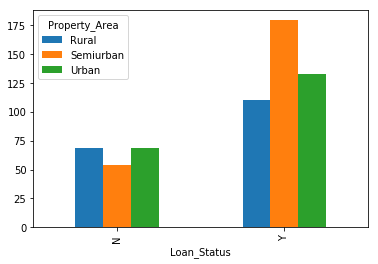

In [35]:
ax4 = pd.crosstab(loan_data['Loan_Status'],loan_data['Property_Area'])
ax4.plot(kind='bar')

In [36]:
loan_data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

In [38]:
loan_data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

as male are more than female so we can fill on missing value of gender as male

In [40]:
loan_data['Gender'].fillna('Male', inplace=True)

In [41]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [42]:
loan_data['Married'].fillna('Yes', inplace=True)

In [43]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [44]:
loan_data['Dependents'].fillna(0, inplace=True)

In [45]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [46]:
loan_data['Self_Employed'].fillna('No', inplace=True)

In [47]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
loan_data['Loan_Amount_Term'].fillna(360, inplace=True)

In [49]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [50]:
loan_data['Credit_History'].fillna(1.0, inplace=True)

In [51]:
loan_data.apply(lambda x: sum(x.isna()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

** Treating extreme values in the loanamount and applicant income as follows. **

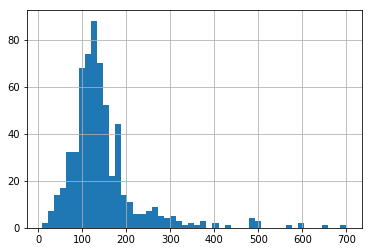

In [51]:
loan_data['LoanAmount'].hist(bins=50)

In [52]:
loan_data['LoanAmount_log'] = np.log(loan_data['LoanAmount'])

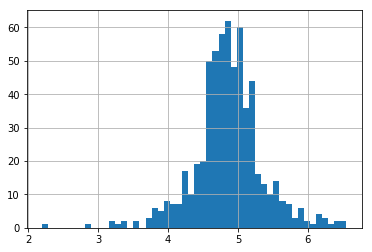

In [53]:
loan_data['LoanAmount_log'].hist(bins=50)

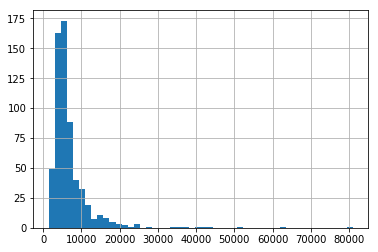

In [52]:
loan_data['TotalIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['TotalIncome'].hist(bins=50)

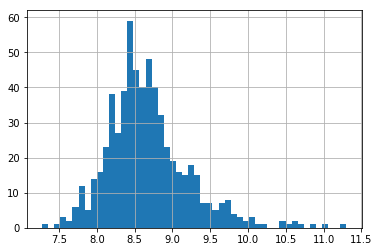

In [53]:
loan_data['TotalIncome_log'] = np.log(loan_data['TotalIncome'])
loan_data['TotalIncome_log'].hist(bins = 50)

In [55]:
table = loan_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

In [56]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


** Now on wards we will predict the probability of getting loan i.e to which person loan will be provided??**

In [58]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515


** we will work on column gender, married, education, self employeed, property area, total income, credit history. **

In [59]:
loan_data['TotalIncome'].mean()

7024.705081414722

In [62]:
x = loan_data['TotalIncome'].max()
loan_data[loan_data['TotalIncome']==x]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,81000.0,11.302204


In [63]:
loan_data[loan_data['TotalIncome']==loan_data['TotalIncome'].min()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,1442.0,7.273786


** from above information we can see that maximum total income of a person is also has credit history is 0. but the person who has total income minimum has credit history is 1. so it is not dependent on total income of a person. **

In [68]:
pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [77]:
emp_credit = pd.crosstab(loan_data['Credit_History'], loan_data['Self_Employed'])
emp_credit

Self_Employed,No,Yes
Credit_History,,
0.0,77,12
1.0,455,70


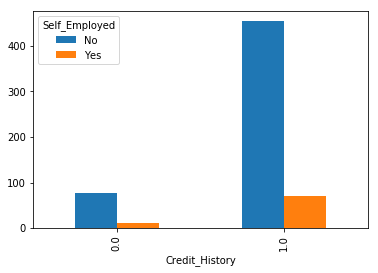

In [78]:
emp_credit.plot(kind='bar')

In [84]:
all_credit = loan_data.pivot_table(values=['Credit_History'], index=['Self_Employed','Gender', 'Married','Education', 'Property_Area'], aggfunc=(np.sum))

In [91]:
all_credit

Credit_History
Self_Employed Gender Married Education    Property_Area                
No            Female No      Graduate     Rural                    14.0
                                          Semiurban                17.0
                                          Urban                    17.0
                             Not Graduate Rural                     4.0
                                          Semiurban                 4.0
                                          Urban                     1.0
                     Yes     Graduate     Rural                     2.0
                                          Semiurban                16.0
                                          Urban                     4.0
                             Not Graduate Rural                     1.0
                                          Semiurban                 3.0
              Male   No      Graduate     Rural                    21.0
                                          Semiurban                26.0
                                          Urban                    29.0
                             Not Graduate Rural                    11.0
                                          Semiurban                 9.0
                                          Urban                     4.0
                     Yes     Graduate     Rural                    57.0
                                          Semiurban                81.0
                                          Urban                    78.0
                             Not Graduate Rural                    20.0
                                          Semiurban                17.0
                                          Urban                    19.0
Yes           Female No      Graduate     Rural                     1.0
                                          Semiurban                 4.0
                                          Urban                     2.0
                             Not Graduate Semiurban                 2.0
                                          Urban                     1.0
                     Yes     Graduate     Rural                     0.0
                                          Semiurban                 1.0
                                          Urban                     0.0
                             Not Graduate Rural                     1.0
              Male   No      Graduate     Rural                     3.0
                                          Semiurban                 4.0
                                          Urban                     4.0
                             Not Graduate Rural                     1.0
                                          Semiurban                 2.0
                                          Urban                     0.0
                     Yes     Graduate     Rural                    13.0
                                          Semiurban                14.0
                                          Urban                     9.0
                             Not Graduate Rural                     2.0
                                          Semiurban                 3.0
                                          Urban                     3.0

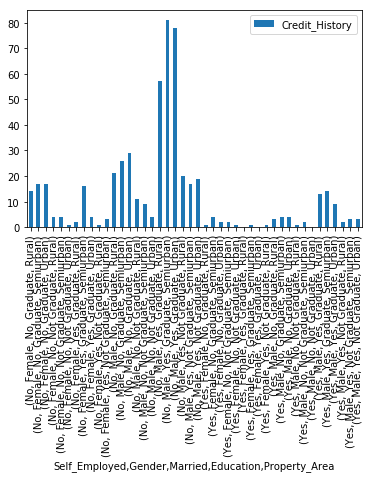

In [90]:
all_credit.plot(kind='bar')

In [92]:
from scipy.stats import mode

In [95]:
mode(loan_data['Gender'])[0]

/home/priyankat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array(['Male'], dtype=object)